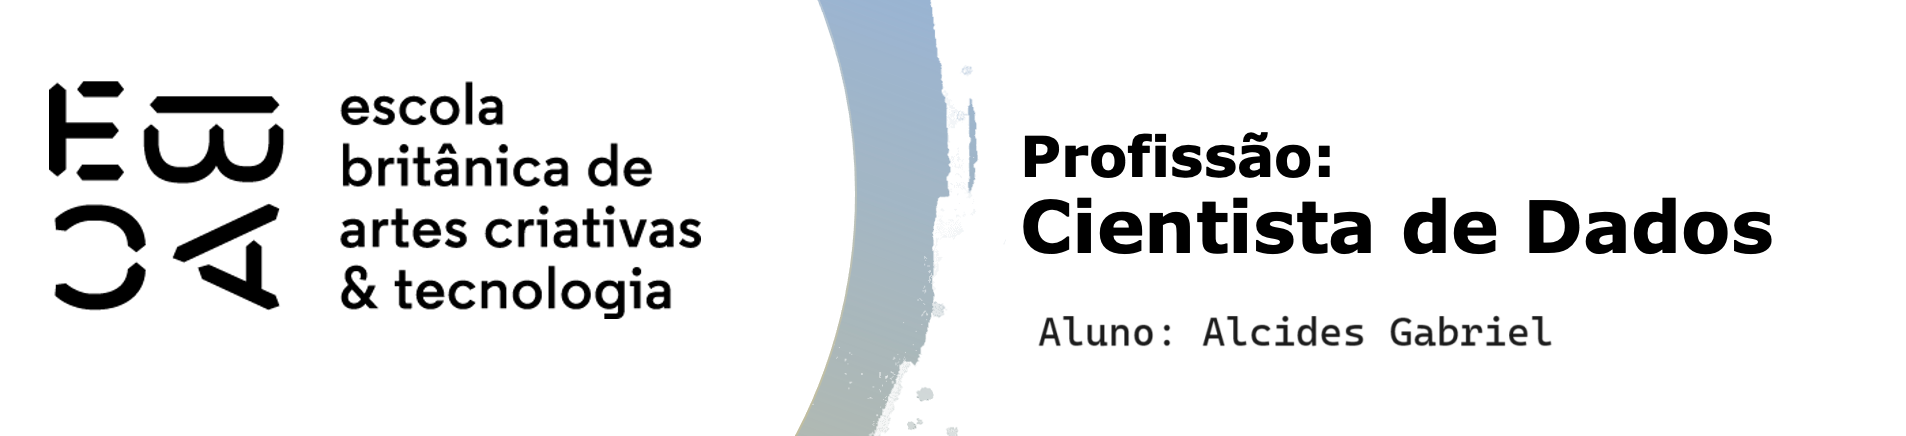

# Técnica Ensemble Learning: Random Forest


## Random Forest

O random forest é um modelo de ensemble learning, baseado em árvores de decisão e acaba sendo uma extensão do modelo bagging, pois ele utiliza o boostrap para a seleção dos atributos para a montagem da árvore de decisão independente, a diferença está que o random forest considera somente os melhores atributos no processo de divisão no crescimento da árvore, enquanto no bagging todas as features são consideradas para fazer a divisão de um nó.




### Modelo no Python

- **Bibliotecas**
    - Na atividade foi pedido para desenvolver o modelo de random forest, mas para via de comparação será criado usando a biblioteca **Scikit Learning** o modelo RandomForestClassifier e o DecisionTreeClassifier
    - Para o treinamento do modelo e comparação de resultados será utilizado o dataset previsão de bom e mau pagadores para um empréstimo bancário. A biblioteca para importar e manipular esses dados será o **Pandas**.
    - Para algumas movimentações de matrizes, será utilizado o **Numpy**
    
    
- **Avalição**
    - Para a avaliação de modelo será utilizado o método de train_test_split, retornando o classification report


In [75]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report
import random
import math

In [2]:
def importar_dados() -> list:
    
    dt = pd.read_csv('./previsao_de_renda.csv',usecols=range(1,16))
    
    ## Tratamento inicial dos dados.
    ## Apagar Data e índice.
    dt = dt.drop(columns=['data_ref','index'])
    
    # label Encoder
    for atributo in dt.select_dtypes(exclude=np.number):
        dt.loc[:,atributo] = LabelEncoder().fit_transform(dt[atributo])
        
    # Preencher vázio com 0
    dt = dt.fillna(0)
    
    # Visualização
    display(dt.head())
    display(dt.info())
    
    return dt;

In [3]:
df = importar_dados()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,0,1,1,0,2,0,1,36,3.575342,3.0,0,3369.24
1,1,1,1,0,2,2,0,1,42,0.860274,2.0,0,6096.14
2,1,1,1,2,0,3,0,1,31,8.065753,4.0,0,5658.98
3,0,1,0,0,2,2,0,1,50,1.208219,2.0,0,7246.69
4,1,0,0,0,0,2,0,1,52,13.873973,2.0,0,4017.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  int64  
 1   posse_de_veiculo       15000 non-null  int64  
 2   posse_de_imovel        15000 non-null  int64  
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  int64  
 5   educacao               15000 non-null  int64  
 6   estado_civil           15000 non-null  int64  
 7   tipo_residencia        15000 non-null  int64  
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          15000 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  mau                    15000 non-null  int64  
 12  renda                  15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


None

## Usando o modelo do Scikit Learning

In [4]:
def val_score(data: list) -> list:
    X = data.copy()
    y = X.pop('mau')
    # Criar 20 árvores.
    clf = RandomForestClassifier(n_estimators=20)
    # Retornar a média de ]8 divisões dos dados
    return cross_val_score(clf,X,y,cv=8).mean()

val_score(df)

0.987

## Criando um modelo

In [100]:
def modelo_criado(data: list) -> list:
    X = data.copy()
    y = X.pop('mau')
    
    m = X.shape[1]
    p = int(math.sqrt(m))
    
    n_models = 20
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    models = []
    atributos = []
    resultados = pd.DataFrame()
    
    for cla in range(n_models):
        atributo = random.sample(X.columns.tolist(), p)
        atributos.append(atributo)
        X_train_ = X_train[atributo].copy()
        X_test_ = X_test[atributo].copy()
        clf = DecisionTreeClassifier()
        clf.fit(X_train_, y_train)
        models.append(clf)
        prev = clf.predict(X_test_)
        resultados[cla] = prev.astype(str)
    
    return resultados.mode(1).astype(int), y_test
    
def resultado_total(y_real, y_prev):
    return print(classification_report(y_real, y_prev))
    

In [104]:
resultado, real = modelo_criado(df)


In [105]:
resultado_total(real, resultado[0])

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2923
           1       0.00      0.00      0.00        77

    accuracy                           0.97      3000
   macro avg       0.49      0.50      0.49      3000
weighted avg       0.95      0.97      0.96      3000



C:\Users\alcid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alcid\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
